In [1]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install  StatsForecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.6 MB/s eta 0:00:00


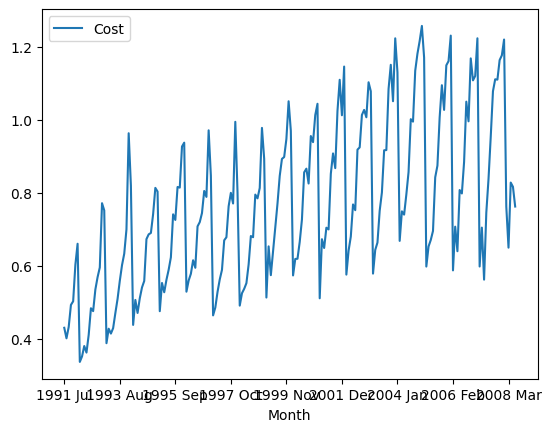

In [ ]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [2]:
ap1

NameError: name 'ap1' is not defined

Using the above data set

1)Test stationary of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criterion metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Using the Statsforecast library, implement the following models: AutoARIMA, AutoETS, HoltWinters,  AutoTheta, and MSTL and plot the forecast of this model .Evaluate the performance of these model model using  MSE (Mean Squared Error).Note that seasonality period is 12.


In [11]:
import pandas as pd
from matplotlib import pyplot as plt

# Load the dataset
ap1 = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1 = ap1.set_index('Month')




In [12]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on the 'Cost' column
result = adfuller(ap1['Cost'])

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')


ADF Statistic: -1.6967562070359845
p-value: 0.43278454683042955
Critical Value (1%): -3.465620397124192
Critical Value (5%): -2.8770397560752436
Critical Value (10%): -2.5750324547306476


At a 5% significance level, you reject the null hypothesis if:

The p-value < 0.05, and
The ADF Statistic is less than the 5% critical value.

In [14]:
# First difference
ap1_diff1 = ap1['Cost'].diff().dropna()

# ADF test on first difference
from statsmodels.tsa.stattools import adfuller

result_diff1 = adfuller(ap1_diff1)
print("First Differencing:")
print('ADF Statistic:', result_diff1[0])
print('p-value:', result_diff1[1])
for key, value in result_diff1[4].items():
    print(f'Critical Value ({key}): {value}')


First Differencing:
ADF Statistic: -3.3659382333938805
p-value: 0.012176310540912193
Critical Value (1%): -3.465811691080702
Critical Value (5%): -2.877123351472649
Critical Value (10%): -2.5750770662586864


In [15]:
# Seasonal difference with lag 12
ap1_seasonal_diff = ap1['Cost'].diff(12).dropna()

# ADF test on seasonal difference
result_seasonal_diff = adfuller(ap1_seasonal_diff.dropna())
print("\nSeasonal Differencing (lag=12):")
print('ADF Statistic:', result_seasonal_diff[0])
print('p-value:', result_seasonal_diff[1])
for key, value in result_seasonal_diff[4].items():
    print(f'Critical Value ({key}): {value}')



Seasonal Differencing (lag=12):
ADF Statistic: -3.368644444278831
p-value: 0.012075368713834808
Critical Value (1%): -3.467631519151906
Critical Value (5%): -2.8779183721695567
Critical Value (10%): -2.575501353364474


In [16]:
# Combined differencing
ap1_combined_diff = ap1['Cost'].diff().diff(12).dropna()

# ADF test on combined differenced series
result_combined_diff = adfuller(ap1_combined_diff)
print("\nFirst + Seasonal Differencing:")
print('ADF Statistic:', result_combined_diff[0])
print('p-value:', result_combined_diff[1])
for key, value in result_combined_diff[4].items():
    print(f'Critical Value ({key}): {value}')



First + Seasonal Differencing:
ADF Statistic: -5.07040327971582
p-value: 1.607283495966982e-05
Critical Value (1%): -3.467631519151906
Critical Value (5%): -2.8779183721695567
Critical Value (10%): -2.575501353364474


If p-value < 0.05, reject H₀ ⇒ series is stationary.
If ADF statistic < critical value (5%), it also supports stationarity.

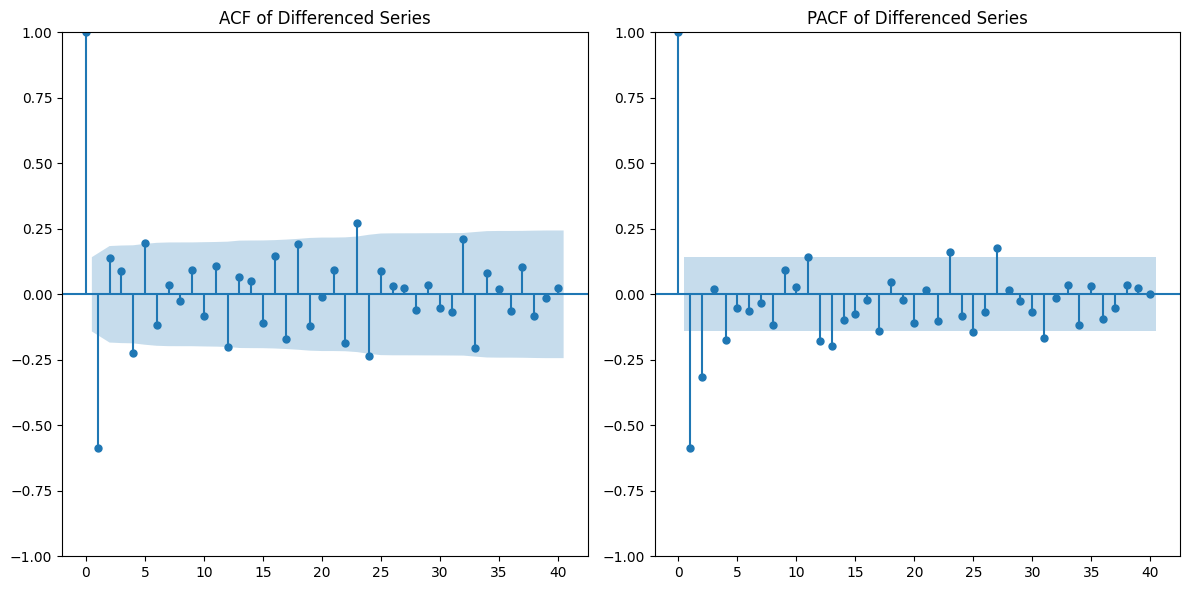

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the series
ap1 = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1 = ap1.set_index('Month')
series = ap1['Cost']

# Differencing
seasonal_period = 12
diff_series = series.diff().dropna()
seasonal_diff_series = diff_series.diff(seasonal_period).dropna()

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(seasonal_diff_series, lags=40, ax=plt.gca())
plt.title('ACF of Differenced Series')

plt.subplot(1, 2, 2)
plot_pacf(seasonal_diff_series, lags=40, ax=plt.gca(), method='ywm')
plt.title('PACF of Differenced Series')

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [9]:
ap1 = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1 = ap1.set_index('Month')
ap1.index = pd.to_datetime(ap1.index)  # ensure datetime index
data = ap1.iloc[:, 0]  # assuming first column is the series of interest



<ipython-input-9-c272c2e521df>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ap1.index = pd.to_datetime(ap1.index)  # ensure datetime index


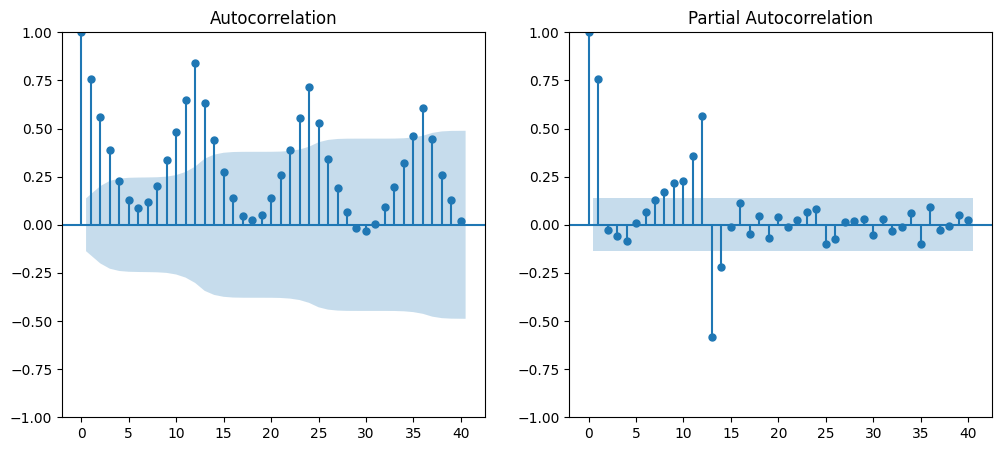

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(data, lags=40, ax=plt.gca())
plt.subplot(1,2,2)
plot_pacf(data, lags=40, ax=plt.gca(), method='ywm')
plt.show()


In [11]:
# Assume data is already loaded as 'data' with datetime index
train = data[:-12]  # all but last 12 months
test = data[-12:]   # last 12 months


In [12]:
import statsmodels.api as sm

# Fit on training data
model = sm.tsa.statespace.SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()
print(f'Training AIC: {result.aic}')


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Training AIC: -540.3249388736474


In [13]:
# Forecast the next 12 months
forecast = result.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Print forecasted values
print(forecast_mean)


2007-07-01    0.872355
2007-08-01    1.007523
2007-09-01    1.013037
2007-10-01    1.119029
2007-11-01    1.102099
2007-12-01    1.130822
2008-01-01    1.189221
2008-02-01    0.587884
2008-03-01    0.687493
2008-04-01    0.595030
2008-05-01    0.742447
2008-06-01    0.815959
Freq: MS, Name: predicted_mean, dtype: float64


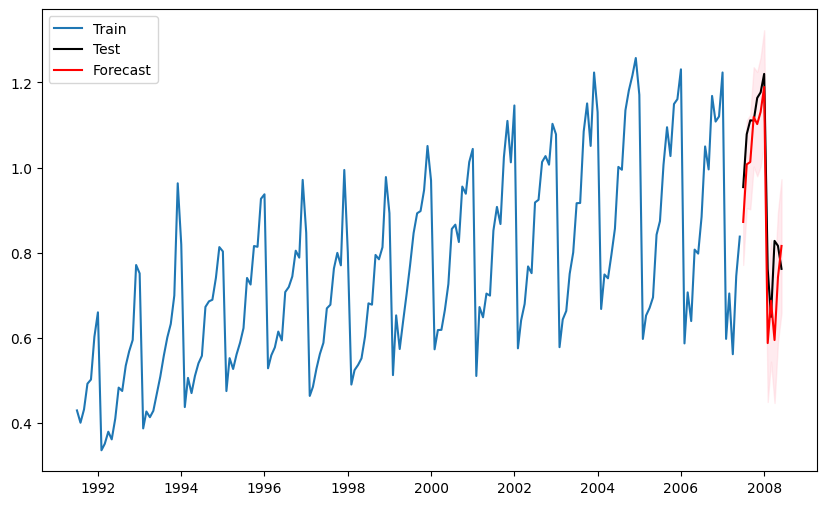

In [14]:
plt.figure(figsize=(10,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='black')
plt.plot(forecast_mean, label='Forecast', color='red')

# Optional: add confidence intervals
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)

plt.legend()
plt.show()


<ipython-input-15-5f1d0d2350d0>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ap1.index = pd.to_datetime(ap1.index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


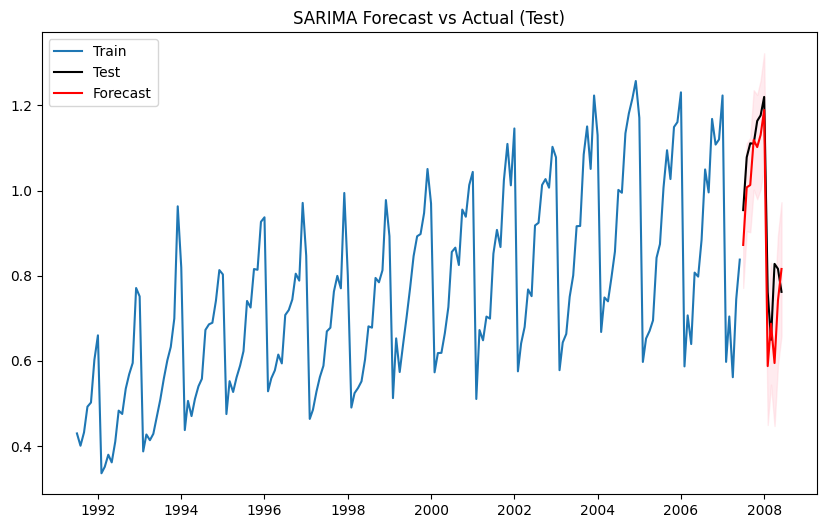

MAE (Mean Absolute Error): 0.08082367300640254
MAPE (Mean Absolute Percentage Error): 9.11%
MSE (Mean Squared Error): 0.010203723841123955


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Load data (adjust path if necessary)
ap1 = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1 = ap1.set_index('Month')
ap1.index = pd.to_datetime(ap1.index)
data = ap1.iloc[:, 0]  # assuming first column is the series of interest

# Split into train and test (last 12 months for test)
train = data[:-12]
test = data[-12:]

# Fit SARIMA model (chosen SARIMA(1,1,1)(1,1,1,12))
model = sm.tsa.statespace.SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# Forecast the next 12 months
forecast = result.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot Train, Test, and Forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='black')
plt.plot(forecast_mean, label='Forecast', color='red')

# Add confidence intervals
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.title('SARIMA Forecast vs Actual (Test)')
plt.legend()
plt.show()

# Evaluate Model Performance: MAE, MAPE, MSE
mae = mean_absolute_error(test, forecast_mean)
mape = mean_absolute_percentage_error(test, forecast_mean)
mse = mean_squared_error(test, forecast_mean)

# Print evaluation metrics
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.2%}')
print(f'MSE (Mean Squared Error): {mse}')


In [16]:
pip install statsforecast


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.2 MB/s eta 0:00:00


In [25]:
import pandas as pd

# Load the data from the provided URL
file_url = 'https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv'
ap1 = pd.read_csv(file_url)

# Check the first few rows to understand its structure
ap1.head()



,Month,Cost
0,1991 Jul,0.429795
1,1991 Aug,0.400906
2,1991 Sep,0.432159
3,1991 Oct,0.492543
4,1991 Nov,0.502369


<ipython-input-26-cf633e4f7917>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ap1['Month'] = pd.to_datetime(ap1['Month'])  # Ensure 'Month' is in datetime format if it isn't already


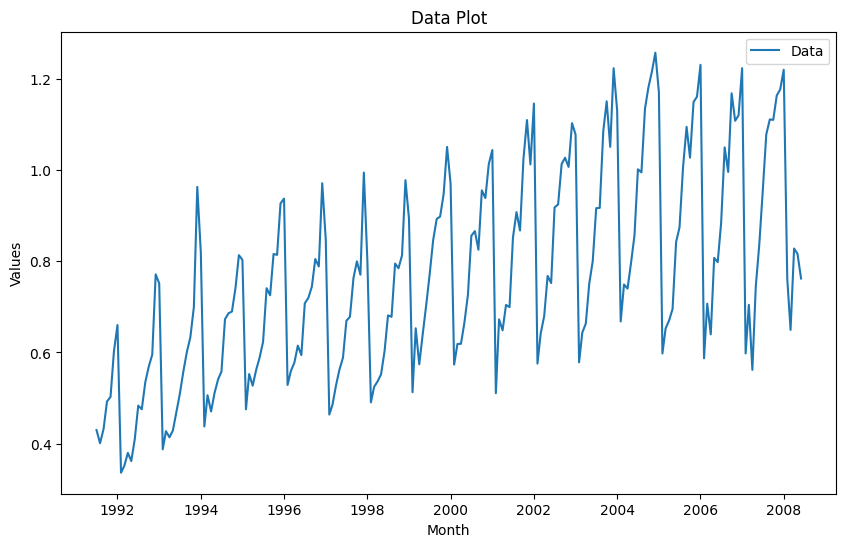

In [26]:
import matplotlib.pyplot as plt

# Plot the data to visualize trends
ap1['Month'] = pd.to_datetime(ap1['Month'])  # Ensure 'Month' is in datetime format if it isn't already
plt.figure(figsize=(10, 6))
plt.plot(ap1['Month'], ap1.iloc[:, 1], label='Data')
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Data Plot')
plt.legend()
plt.show()
